In [5]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np

In [9]:
with open('primitive_length.pkl', 'rb') as f:
    L = pickle.load(f)
f.close()

with open('noise_switch_time.pkl', 'rb') as f:
    switch_list = pickle.load(f)
f.close()
print(L)

[ 1  3  5  7  9 11 13 15 17 19 20 30 40 50 60 70 80 90]


F_Ciff = 1 - r =  0.921633365851666
A =  0.6424675058671554


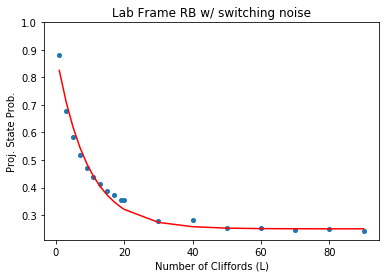

[0.88024446 0.67893972 0.58189641 0.51875087 0.470991   0.43794003
 0.41257318 0.38615965 0.37217356 0.3564762  0.35561133 0.27720231
 0.2808685  0.25404237 0.25470739 0.2472131  0.24764465 0.24210319]
[0.6302444571064841, 0.4289397166691954, 0.3318964102114441, 0.26875086704701745, 0.22099099728182658, 0.1879400337025499, 0.1625731781475495, 0.13615964648555057, 0.12217355626613946, 0.10647619803342645, 0.10561132750782642, 0.02720231090503178, 0.030868499083280487, 0.004042367065828278, 0.004707392875753669, -0.0027868969190203707, -0.002355346094920774, -0.007896808282132267]
F_Ciff = 1 - r =  0.9387469562742321
A =  0.6065306597126335


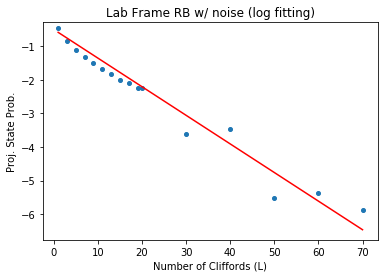

In [10]:
with open('20.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

y = data[1]
###############
# SRB with fixed B

def func(x, A, r):
    return  A * (1 - 4/3*r)**x + 0.25

popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
print("F_Ciff = 1 - r = ", 1 - popt[1])
print("A = ", popt[0])

plt.plot(L, y, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ switching noise")
plt.show()

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

y_fit = [p - 0.25 for p in y]
print(y)
print(y_fit)
y_fit = np.log(np.absolute(y_fit))
L = L[0:16]
y_fit = y_fit[0:16]
popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
r = 3/4 * (1 - np.exp(popt[1]))
print("F_Ciff = 1 - r = ", 1 - r)
print("A = ", np.exp(popt[0]))

plt.plot(L, y_fit, 'o', markersize=4)
plt.plot(L, func(L, *popt), 'r-')
plt.ylim(top=np.log(0.75))
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
plt.title("Lab Frame RB w/ noise (log fitting)")
plt.show()

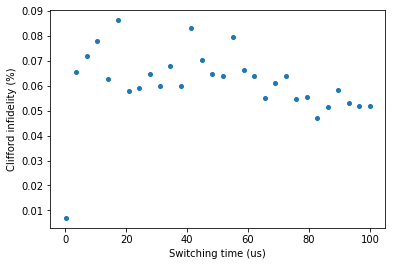

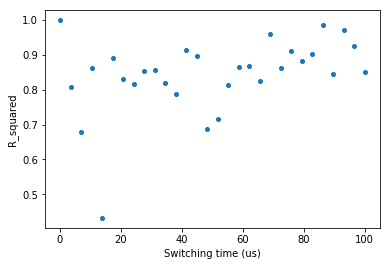

In [11]:
###############
# SRB with fixed B

# def func(x, A, r):
#     return  A * (1 - 4/3*r)**x + 0.25

###############
# Fixed constant term with logarithm
# a = ln(A)
# b = ln(1 - 4/3*r)
def func(x, a, b):
    return  a + b*x

F_Clifford = np.zeros(len(switch_list))
r_sqrd = np.zeros(len(switch_list))

for i in range(len(switch_list)):
    with open(str(i) + '.pkl', 'rb') as f:
        data = pickle.load(f)
    f.close()
    
    noise_index = data[0]
    y = data[1]
    
    ###############
    # SRB with fixed B
#     popt, pcov = curve_fit(func, L, y, p0=[1, 0], bounds=(0, 1), maxfev=5000)
#     F_Clifford[i] = popt[1] * 100
    
    ###############
    # Fixed constant term with logarithm
    y_fit = [p - 0.25 for p in y]
    y_fit = np.log(np.absolute(y_fit))
    L = L[0:16]
    y_fit = y_fit[0:16]
    popt, pcov = curve_fit(func, L, y_fit, p0=[-0.5, -0.5], bounds=[(-0.5, -0.5), (0, 0)], maxfev=5000)
    F_Clifford[i] = 3/4 * (1 - np.exp(popt[1]))
    residuals = y_fit - func(L, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
    r_sqrd[i] = 1 - (ss_res/ss_tot)

plot1 = plt.figure(1)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, F_Clifford, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("Clifford infidelity (%)")
plt.show()

plot2 = plt.figure(2)
plt_switch_list = [x * 1000000 for x in switch_list]
plt.plot(plt_switch_list, r_sqrd, 'o', markersize=4)
plt.xlabel("Switching time (us)")
plt.ylabel("R_squared")
plt.show()